In [247]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import time

import pandas as pd


In [248]:
from bs4 import BeautifulSoup
import requests

URL = "https://www.amazon.fr/Clean-Code-Handbook-Software-Craftsmanship/dp/0132350882/ref=sr_1_1?__mk_fr_FR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=3HNODLAO22X28&keywords=clean+code&qid=1653480800&sprefix=clean+code+%2Caps%2C80&sr=8-1"

HEADERS = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7",
    "user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36",
}

webpage = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(webpage.content, "lxml")
print(soup.prettify())


<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="fr-fr">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=f

In [249]:
try:
    title = soup.find("span", attrs={"id": "productTitle"})
    title_value = title.string

    title_string = title_value.strip().replace(",", "")

except AttributeError:

    title_string = "NA"
    print("product Title = ", title_string)


In [250]:
title_string


'Clean Code: A Handbook of Agile Software Craftsmanship'

In [251]:
URL_COMMENTS = "https://www.amazon.fr/Clean-Code-Handbook-Software-Craftsmanship/product-reviews/0132350882/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

HEADERS = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7",
    "user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36",
}

webpage = requests.get(URL_COMMENTS, headers=HEADERS)
soup = BeautifulSoup(webpage.content, "lxml")
comments_text = []
comments_titles = []
review = []
dates = []
comments_utility = []
try:

    all_ifo = soup.find_all("div", attrs={"class": "a-section celwidget"})
    for all_info in all_ifo:
        comments_value = all_info.find(
            "span", attrs={"class": "a-size-base review-text review-text-content"}
        )
        rating = all_info.find("i", class_="review-rating")
        title = all_info.find("a", class_="review-title-content")
        date = all_info.find("span", class_="a-size-base a-color-secondary review-date")

        utility = all_info.find(
            "span", class_="a-size-base a-color-tertiary cr-vote-text"
        )

        comments_text.append(comments_value.text)
        review.append(rating.text)
        comments_titles.append(title.text)
        dates.append(date.text)
        if utility is None:
            utility_value = "NA"
        else:
            comments_utility.append(utility.text)
except AttributeError as err:
    print("ERROR", err)


In [252]:
def check_if_empty(value, array):
    if value is None:
        value = "NA"
        array.append(value)
    else:
        array.append(value.text)
    return array


In [253]:

def get_comments(page_number: int):
    """get_comments get all the information about commens

    :param page_number: how many pages we want to interate
    """
    comments_text = []
    comments_titles = []
    review = []
    dates = []
    comments_utility = []
    
    for page in range(1, page_number):
        URL_COMMENTS = f"https://www.amazon.fr/AmazonBasics-Fauteuil-bureau-dossier-bas/product-reviews/B016ID34BO/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={page}"
        print('Loading...',page)

        HEADERS = {
            "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
            "accept-encoding": "gzip, deflate, br",
            "accept-language": "fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7",
            "user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36",
        }

        webpage = requests.get(URL_COMMENTS, headers=HEADERS)
        soup = BeautifulSoup(webpage.content, "lxml")
        
        try:

            all_ifo = soup.find_all("div", attrs={"class": "a-section celwidget"})
            for all_info in all_ifo:
                comments_value = all_info.find(
                    "span", attrs={"class": "a-size-base review-text review-text-content"}
                )
                rating = all_info.find("i", class_="review-rating")
                title = all_info.find("a", class_="review-title-content")
                date = all_info.find(
                    "span", class_="a-size-base a-color-secondary review-date"
                )

                utility = all_info.find(
                    "span", class_="a-size-base a-color-tertiary cr-vote-text"
                )

                check_if_empty(comments_value, comments_text)
                check_if_empty(rating, review)
                check_if_empty(title, comments_titles)
                check_if_empty(date, dates)
                check_if_empty(utility, comments_utility)
                
                
        except AttributeError as err:
            print("ERROR", err)
            
    return comments_text, review, comments_titles, dates, comments_utility


In [254]:
comments_text, review, comments_titles, dates, comments_utility = get_comments(50)
print(len(comments_text), len(review), len(comments_titles), len(dates), len(comments_utility))
dictionaire  = {'comments_text': comments_text, 'review': review, 'comments_titles': comments_titles, 'dates': dates, 'comments_utility': comments_utility}


Loading... 1
Loading... 2
Loading... 3
Loading... 4
Loading... 5
Loading... 6
Loading... 7
Loading... 8
Loading... 9
Loading... 10
Loading... 11
Loading... 12
Loading... 13
Loading... 14
Loading... 15
Loading... 16
Loading... 17
Loading... 18
Loading... 19
Loading... 20
Loading... 21
Loading... 22
Loading... 23
Loading... 24
Loading... 25
Loading... 26
Loading... 27
Loading... 28
Loading... 29
Loading... 30
Loading... 31
Loading... 32
Loading... 33
Loading... 34
Loading... 35
Loading... 36
Loading... 37
Loading... 38
Loading... 39
Loading... 40
Loading... 41
Loading... 42
Loading... 43
Loading... 44
Loading... 45
Loading... 46
Loading... 47
Loading... 48
Loading... 49
490 490 490 490 490


In [255]:
df = pd.DataFrame(dictionaire)
df

,comments_text,review,comments_titles,dates,comments_utility
0,\nJe viens de recevoir ce fauteuil de travail ...,"4,0 sur 5 étoiles","\nFauteuil de travail basique, mais robuste et...",Commenté en France le 17 août 2017,43 personnes ont trouvé cela utile
1,\nLivraison très rapide par Chronopost.Ce fau...,"4,0 sur 5 étoiles",\nBonne qualité et assise confortable\n,Commenté en France le 3 avril 2019,18 personnes ont trouvé cela utile
2,\nJ'avais besoin d'une nouvelle chaise pour l'...,"3,0 sur 5 étoiles",\nchaise un peu bancale\n,Commenté en France le 16 septembre 2019,13 personnes ont trouvé cela utile
3,\nJ'ai choisi ce siège pour 2 raisons : je n'a...,"5,0 sur 5 étoiles",\nTrès satisfait\n,Commenté en France le 28 août 2017,14 personnes ont trouvé cela utile
4,\nCette chaise de bureau est inconfortable. Je...,"1,0 sur 5 étoiles",\nNul\n,Commenté en France le 21 octobre 2021,5 personnes ont trouvé cela utile
...,...,...,...,...,...
485,\nThe chair itself is solid and worth the purc...,"4,0 sur 5 étoiles",NA,Commenté en Allemagne le 30 janvier 2021,NA
486,\nDer Stuhl ist sehr bequem und schön. Die Mon...,"5,0 sur 5 étoiles",NA,Commenté en Allemagne le 12 mars 2019,NA
487,"\nStuhl ist sehr angenehm, obwohl die relativ ...","4,0 sur 5 étoiles",NA,Commenté en Allemagne le 27 septembre 2021,NA
488,\nSehr angenehmes Sitzen auf diesem Stuhl. Kan...,"5,0 sur 5 étoiles",NA,Commenté en Allemagne le 14 mars 2019,NA


In [256]:
cols_to_check = ['comments_text','comments_titles']
df[cols_to_check] = df[cols_to_check].replace({'\n':' '}, regex=True)

In [257]:
df["review"] = df["review"].str.extract(r'^(\d+)')
df["comments_utility"] = df["comments_utility"].str.extract(r'^(\d+)')
df['review'] = df['review'].astype(int)
df['dates'] = df['dates'].str[22:]


In [258]:
df['words_number']=df['comments_text'].str.split().str.len()

In [259]:
df_positive = df[df.review > 3]
df_negative = df[df.review < 3]


In [260]:
df_positive['words_number'].mean()
f'''Mean of counted words of a positive comment = {df_positive["words_number"].mean():.2f}, 
  Mean of counted words of a positive comment  = {df_negative["words_number"].std():.2f}'''

'Mean of counted words of a positive comment = 29.36, \n  Mean of counted words of a positive comment  = 71.84'

<AxesSubplot:>

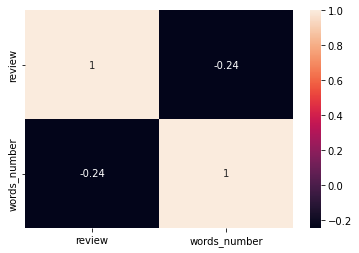

In [261]:
import seaborn as sns 
sns.heatmap(df.corr(), annot=True)
# If we look at the correlation between the number of words and the number of stars, 
# we can see that the number of words is not correlated with the number of stars, even a bit negatively correlated.
# Which means that the number of words is not a good indicator of the number of stars.

<AxesSubplot:xlabel='review', ylabel='words_number'>

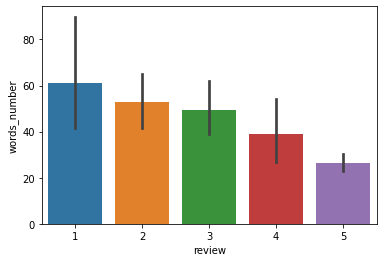

In [262]:
df['comments_utility'].fillna(0, inplace=True)
df['comments_utility'] = df['comments_utility'].astype(int)
df.query('comments_utility > 1').groupby('review').agg({'words_number':'mean'})
sns.barplot(x='review', y='words_number', data=df)
# Here we can see that lesser number of words in a positive comment is associated with a higher number of stars.
# the mean of 5 start review is around 73.041667 words, while the mean of 1 start review is around 96.714286 words.


In [265]:
df

,comments_text,review,comments_titles,dates,comments_utility,words_number
0,Je viens de recevoir ce fauteuil de travail à...,4,"Fauteuil de travail basique, mais robuste et ...",17 août 2017,43,459
1,Livraison très rapide par Chronopost.Ce faut...,4,Bonne qualité et assise confortable,3 avril 2019,18,332
2,J'avais besoin d'une nouvelle chaise pour l'o...,3,chaise un peu bancale,16 septembre 2019,13,132
3,J'ai choisi ce siège pour 2 raisons : je n'ai...,5,Très satisfait,28 août 2017,14,109
4,Cette chaise de bureau est inconfortable. Je ...,1,Nul,21 octobre 2021,5,52
...,...,...,...,...,...,...
485,The chair itself is solid and worth the purch...,4,NA,le 30 janvier 2021,0,23
486,Der Stuhl ist sehr bequem und schön. Die Mont...,5,NA,le 12 mars 2019,0,14
487,"Stuhl ist sehr angenehm, obwohl die relativ s...",4,NA,le 27 septembre 2021,0,12
488,Sehr angenehmes Sitzen auf diesem Stuhl. Kann...,5,NA,le 14 mars 2019,0,12


In [266]:
MONTHS = {'janvier': 1 , 'fevrier': 2 , 'mars': 3 , 'avril': 4 , 'mai': 5 , 'juin': 6 , 'juillet': 7 , 'août': 8 , 'septembre': 9 , 'octobre': 10 , 'novembre': 11 , 'decembre': 12}

df['dates'].replace(MONTHS, inplace=True)

In [267]:
df['dates']

0              17 août 2017
1              3 avril 2019
2         16 septembre 2019
3              28 août 2017
4           21 octobre 2021
               ...         
485      le 30 janvier 2021
486         le 12 mars 2019
487    le 27 septembre 2021
488         le 14 mars 2019
489      le 29 juillet 2019
Name: dates, Length: 490, dtype: object